In [1]:
import torch
import numpy as np
import sys
sys.path.append('../')
from configs.base_config import TrainingConfig
from utils import get_dataloader, TransformFields
import matplotlib.pyplot as plt
import einops
from torch.nn.functional import interpolate


In [ ]:
# Original path : /gpfswork/rech/omr/udu91zn/diffusionmodels/diffModel_experiences/z87envpm
base_path= '/Volumes/LoCe/oceandata/models/dino-fusion/' #'/Users/emeunier/Documents/scai/'
training_tar = ''
config = TrainingConfig()

In [3]:
train_dataloader = get_dataloader(config.data_file, batch_size=config.train_batch_size, fields=config.fields)
config.data_shape = train_dataloader.get_data_shape()
idt = iter(train_dataloader)
batch = next(idt)

Reading infos in /Volumes/LoCe/oceandata//Dino-Fusion/dino_1_4_degree_coarse_130924.tar


In [7]:
sample = trf.uncall(batch[0])

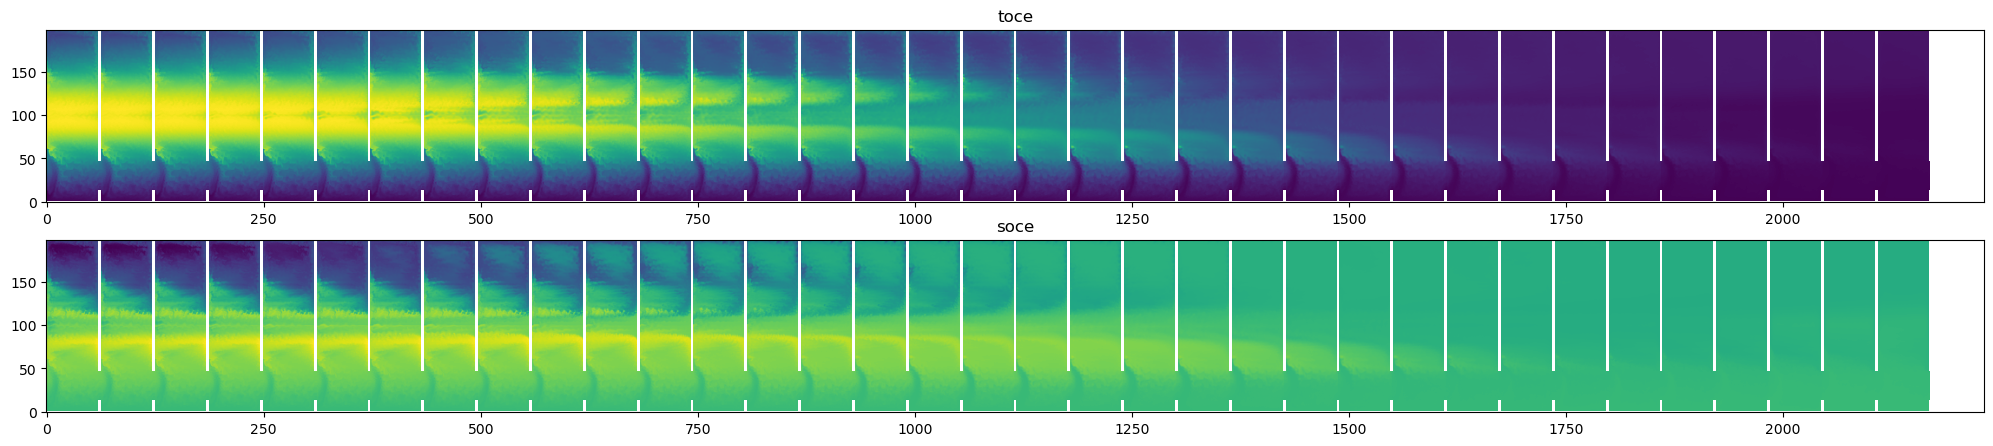

In [19]:
fig, axs = plt.subplots(2,1,figsize=(25,5))

for i, t in enumerate(['toce', 'soce']) :
    axs[i].set_title(t)
    axs[i].imshow(einops.rearrange(sample[f'{t}.npy'], 'z w h -> w (z h)'))
    axs[i].invert_yaxis()

In [ ]:
path_generated=f'{base_path}/z87envpm/epoch_4950.npy'
generated_fields = torch.tensor(np.load(path_generated))
sample_generated = trf.uncall(generated_fields[0])

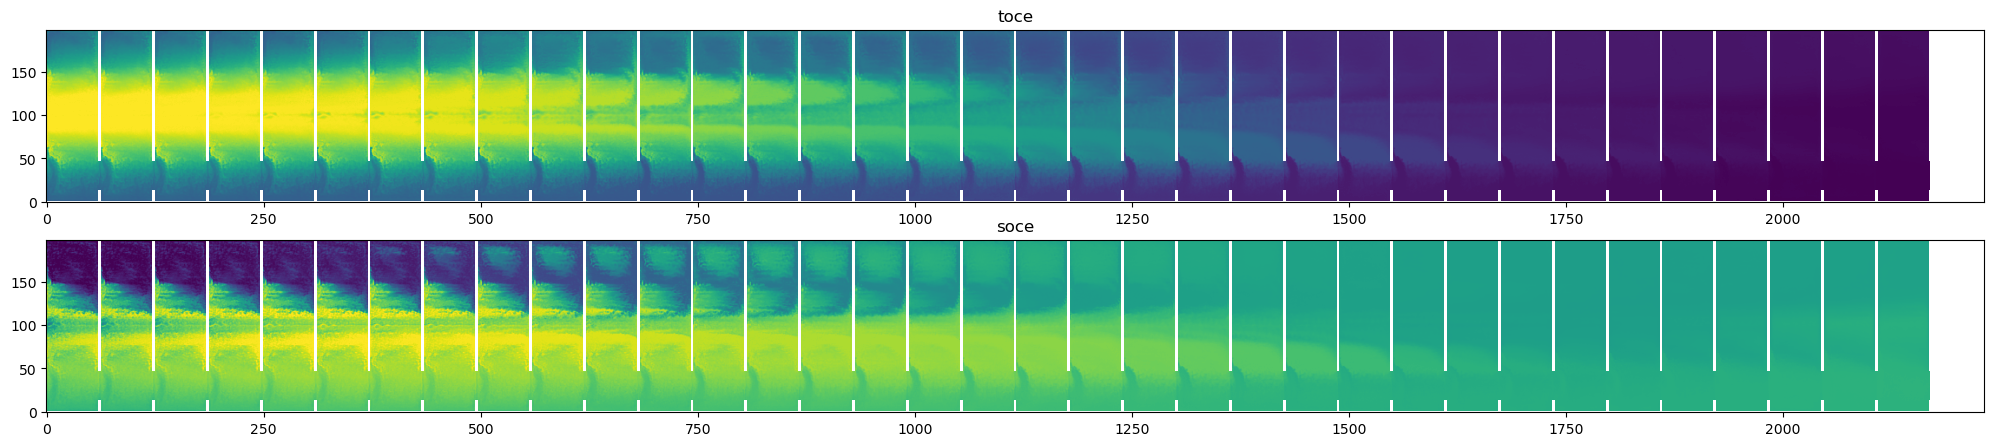

In [20]:
fig, axs = plt.subplots(2,1,figsize=(25,5))

for i, t in enumerate(['toce', 'soce']) :
    axs[i].set_title(t)
    axs[i].imshow(einops.rearrange(sample_generated[f'{t}.npy'], 'z w h -> w (z h)'))
    axs[i].invert_yaxis()

In [ ]:
 def un_stride_concat(self, data) :
        assert self.step == 2, 'Only works for step=2 for now'
        assert (len(data.shape) == 4), 'Only works for arrays like (b c h w) for now'
        ranges = {'toce' : slice(0, 18), 'soce' : slice(18, 36), 'ssh' : slice(36,None)}
        sample =  {key : data[:, val] for key, val in ranges.items()}
        sample['toce'] = self.interpolate_double(sample['toce'])
        sample['soce'] = self.interpolate_double(sample['soce'])
        return sample

In [35]:
from torch.nn.functional import interpolate

In [95]:
x, y = torch.meshgrid([torch.arange(1,10, 2), torch.arange(1, 10, 2)])

In [97]:
x

tensor([[1, 1, 1, 1, 1],
        [3, 3, 3, 3, 3],
        [5, 5, 5, 5, 5],
        [7, 7, 7, 7, 7],
        [9, 9, 9, 9, 9]])

In [ ]:
interpolate(x[None, None].to(float), (10, 5), mode=' ')[0,0]

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.],
        [9., 9., 9., 9., 9.],
        [9., 9., 9., 9., 9.]], dtype=torch.float64)

In [67]:
batch = next(idt)

In [68]:
batch.shape

torch.Size([8, 37, 202, 68])

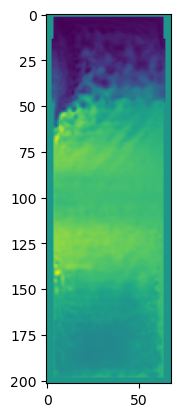

In [71]:
plt.imshow(batch[0,-1])

In [46]:
tf = TransformFields(config.data_file, config.fields)

Reading infos in /Volumes/LoCe/oceandata//Dino-Fusion/dino_1_4_degree_coarse_130924.tar


In [55]:
tf.infos.keys()

dict_keys(['mean', 'std', 'mask', 'soce', 'toce', 'ssh'])

(36, 199, 62)

In [60]:
tf.infos['mask']['soce']

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True, False, False, ..., False, False,  True],
        [ True, False, False, ..., False, False,  True],
        ...,
        [ True, False, False, ..., False, False,  True],
        [ True, False, False, ..., False, False,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True, False, False, ..., False, False,  True],
        [ True, False, False, ..., False, False,  True],
        ...,
        [ True, False, False, ..., False, False,  True],
        [ True, False, False, ..., False, False,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True, False, False, ..., False, False,  True],
        [ True, False, False, ..., False, False,  True],
        ...,
        [ True, False, False, ..., False, False,  True],
        [ True, False, False, ..., False, Fal

In [62]:
batch.shape

torch.Size([8, 37, 202, 68])

In [10]:
import matplotlib.pyplot as plt

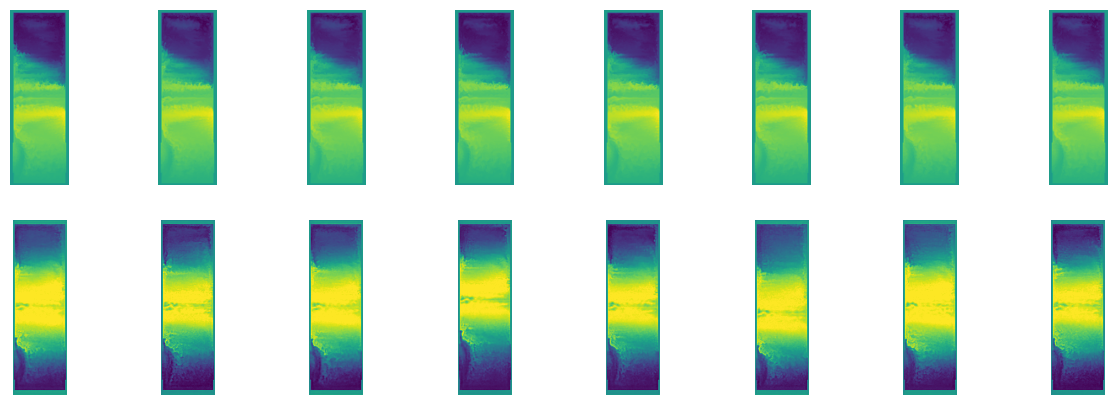

In [12]:
fig, axs = plt.subplots(2, 8, figsize=(15,5))
for i in range(8) :
    axs[0, i].imshow(batch[i,3])
    axs[0,i].axis('off')
    axs[0, i].invert_yaxis()
    axs[1, i].imshow(generated_fields[i,3])
    axs[1, i].invert_yaxis()
    axs[1,i].axis('off')

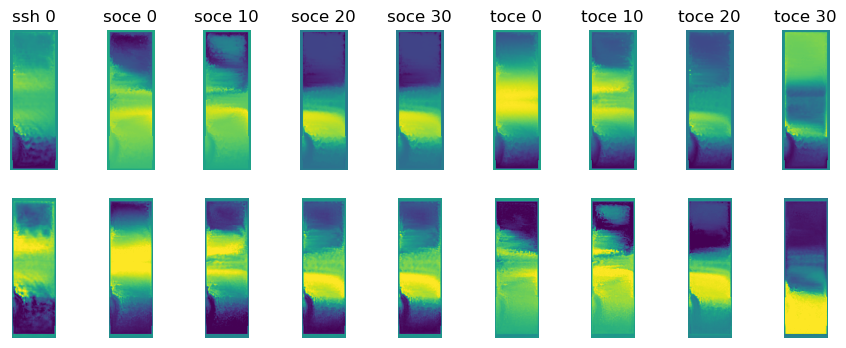

In [13]:
fields ={'ssh 0' : -1, 'soce 0' : 0, 'soce 10' : 5, 'soce 20' : 10, 'soce 30' : 10, 'toce 0' : 18+0, 'toce 10' : 18+5, 'toce 20' : 18+10, 'toce 30' : 18+15 }
fig, axs = plt.subplots(2, len(fields.keys()), figsize=(11,4))

axs[0, 0].set_ylabel('Data')
axs[1, 0].set_xlabel('Data')
for i, (f, fi) in enumerate(fields.items()) :
    axs[0, i].imshow(batch[0,fi])
    axs[0, i].invert_yaxis()
    axs[0, i].axis('off')
    axs[0, i].set_title(f)
    axs[1, i].imshow(generated_fields[3,fi])
    axs[1, i].invert_yaxis()
    axs[1, i].axis('off')
    #axs[2, i].imshow(generated_fields[4,fi])
    #axs[2, i].invertoce yaxis()

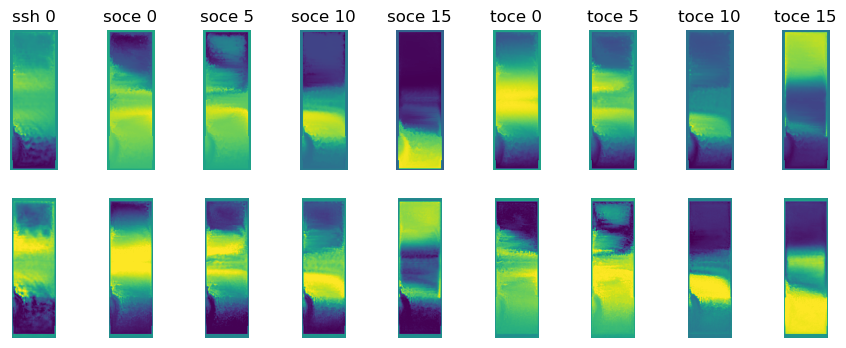

In [31]:
soce_gen = generated_fields[:, 0:18]
toce_gen = generated_fields[:, 19:-1]
ssh_gen = generated_fields[:, -1:]


soce = batch[:, 0:18]
toce = batch[:, 19:-1]
ssh = batch[:, -1:]

fields =['ssh 0',  'soce 0', 'soce 5', 'soce 10' , 'soce 15' , 'toce 0', 'toce 5' , 'toce 10' , 'toce 15']
fig, axs = plt.subplots(2, len(fields), figsize=(11,4))

d = {'toce' : toce, 'soce' : soce, 'ssh' : ssh}
d_gen = {'toce' : toce_gen, 'soce' : soce_gen, 'ssh' : ssh_gen}


axs[0, 0].set_ylabel('Data')
axs[1, 0].set_xlabel('Data')
for i, f in enumerate(fields) :
    name, idx = f.split(' ')
    idx = int(idx)

    axs[0, i].imshow(d[name][0, idx])
    axs[0, i].invert_yaxis()
    axs[0, i].axis('off')
    axs[0, i].set_title(f)
    axs[1, i].imshow(d_gen[name][3, idx])
    axs[1, i].invert_yaxis()
    axs[1, i].axis('off')
    #axs[2, i].imshow(generated_fields[4,fi])
    #axs[2, i].invertoce yaxis()

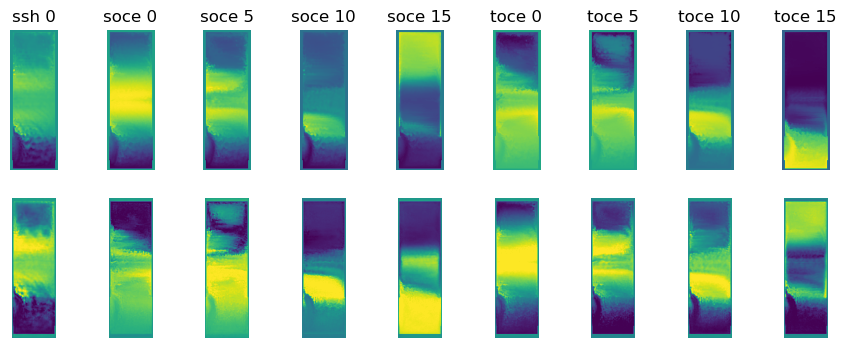

In [32]:
toce_gen = generated_fields[:, 0:18]
soce_gen = generated_fields[:, 19:-1]
ssh_gen = generated_fields[:, -1:]


toce = batch[:, 0:18]
soce = batch[:, 19:-1]
ssh = batch[:, -1:]

fields =['ssh 0',  'soce 0', 'soce 5', 'soce 10' , 'soce 15' , 'toce 0', 'toce 5' , 'toce 10' , 'toce 15']
fig, axs = plt.subplots(2, len(fields), figsize=(11,4))

d = {'toce' : toce, 'soce' : soce, 'ssh' : ssh}
d_gen = {'toce' : toce_gen, 'soce' : soce_gen, 'ssh' : ssh_gen}


axs[0, 0].set_ylabel('Data')
axs[1, 0].set_xlabel('Data')
for i, f in enumerate(fields) :
    name, idx = f.split(' ')
    idx = int(idx)

    axs[0, i].imshow(d[name][0, idx])
    axs[0, i].invert_yaxis()
    axs[0, i].axis('off')
    axs[0, i].set_title(f)
    axs[1, i].imshow(d_gen[name][3, idx])
    axs[1, i].invert_yaxis()
    axs[1, i].axis('off')
    #axs[2, i].imshow(generated_fields[4,fi])
    #axs[2, i].invertoce yaxis()

In [28]:
d[name][idx].shape

torch.Size([1, 202, 68])